In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
temp= df.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
df['quarter'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

C:\Users\Dell\AppData\Local\Temp/ipykernel_5672/758400630.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp= df.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   quarter  42 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [5]:
df.drop('Quarter',axis=1,inplace=True)

In [6]:
df.head()

,Sales,quarter
0,1734.827000,Jan-1986
1,2244.960999,Apr-1986
2,2533.804993,Jul-1986
3,2154.962997,Oct-1986
4,1547.818996,Jan-1987


In [7]:
df['quarter']=pd.to_datetime(df['quarter'])

In [8]:
df.set_index('quarter',inplace=True)

In [9]:
df.head()

,Sales
quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


<AxesSubplot:xlabel='quarter'>

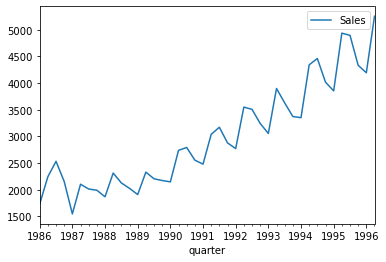

In [10]:
df.plot()

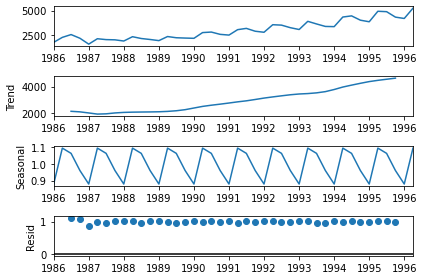

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df,model='multiplicative',period=4).plot();

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df)
print('p value of adfuller test: ',adftest[1])

p value of adfuller test:  0.9966611673930905


p value is greater than 0.05 which represents the series is not stationary

In [13]:
df.shape

(42, 1)

In [42]:
train=df.head(38)
test=df.tail(4)

In [43]:
train

,Sales
quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


In [44]:
test

,Sales
quarter,
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0
1996-04-01,5253.0


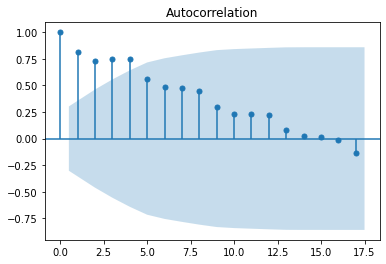

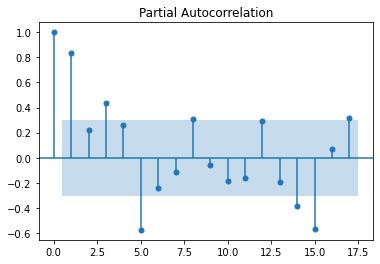

In [46]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df['Sales']);
tsa_plots.plot_pacf(df['Sales']);

In [89]:
#hyper parameter for pdq values
import itertools
p=q=range(0,9)
d=range(0,4)


In [90]:
pdq_combinations=list(itertools.product(p,d,q))

In [91]:
pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 0, 8),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 2, 7),
 (1, 2, 8),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 3, 7),
 (1, 3, 8),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 0, 8),
 (2, 1, 0),
 (2, 1, 1),
 (2,

In [92]:
from statsmodels.tsa.arima_model import ARIMA
import warnings


In [93]:
warnings.filterwarnings("ignore")

In [94]:
rmse=[]
order=[]
for pdq in pdq_combinations:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(df)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        rmse.append(error)
        order.append(pdq)
    except:
        continue

In [95]:
rsults=pd.DataFrame(data=rmse,index=order,columns=['RMSE'])

In [96]:
rsults.sort_values('RMSE')

,RMSE
"(5, 0, 1)",109.214802
"(6, 0, 0)",109.844951
"(5, 0, 0)",112.473550
"(3, 0, 0)",337.579371
"(4, 0, 0)",368.950001
...,...
"(0, 2, 6)",4979.308233
"(0, 2, 7)",4985.047300
"(0, 2, 5)",4988.873993
"(0, 2, 4)",5067.040281


In [97]:
model=ARIMA(train,order=(5,0,1)).fit()
pred=model.predict(start=len(train),end=(len(df)-1))
pred

1995-07-01    4986.374825
1995-10-01    4478.533807
1996-01-01    4320.273948
1996-04-01    5300.296242
Freq: QS-OCT, dtype: float64

In [98]:
test

,Sales
quarter,
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0
1996-04-01,5253.0


In [99]:
error=np.sqrt(mean_squared_error(test,pred))
error

109.21480226367632

<AxesSubplot:xlabel='quarter'>

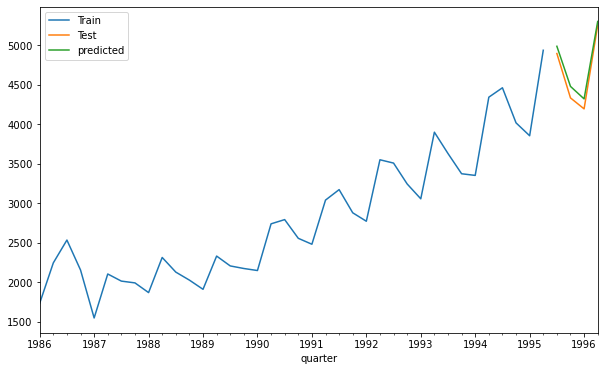

In [101]:
train['Sales'].plot(legend=True, label='Train', figsize=(10,6))
test['Sales'].plot(legend=True, label='Test')

pred.plot(legend=True, label='predicted')

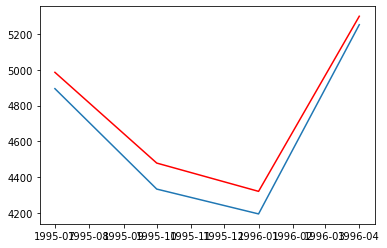

In [100]:
plt.plot(test)
plt.plot(pred, color='red')